In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
#Import required libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the training and validation dataset from corresponding json files

data = json.load(open('train.json'))                         #load training json file
df = pd.DataFrame(data['annotations'])
df = df.drop(['imageId'], axis=1)                            #drop the imageId column as its unnecessary
df1 = pd.DataFrame(data['images'])
train_df = pd.concat([df, df1], axis=1)


vdata = json.load(open('validation.json'))                    #load validation json file
vdf = pd.DataFrame(vdata['annotations'])
vdf = vdf.drop(['imageId'], axis=1)                           #drop the imageID column as its unnecessary
vdf1 = pd.DataFrame(vdata['images'])
valid_df = pd.concat([vdf, vdf1], axis=1)

print('Training csv:', train_df.shape)
print('Validation csv:', valid_df.shape)

Training csv: (1014544, 3)
Validation csv: (9897, 3)


In [ ]:
#Save the dataframes as csv files
train_df.to_csv('/content/train_df.csv', index = False)
valid_df.to_csv('/content/valid_df.csv', index = False)

#load on restart
#train_df = pd.read_csv('/content/train_df.csv')
#valid_df = pd.read_csv('/content/valid_df.csv')

Prepare the training data

In [ ]:
train_df

,labelId,url,imageId
0,"[95, 66, 137, 70, 20]",https://contestimg.wish.com/api/webimage/570f3...,1
1,"[36, 66, 44, 214, 105, 133]",https://contestimg.wish.com/api/webimage/5468f...,2
2,"[170, 66, 97, 153, 105, 138]",https://contestimg.wish.com/api/webimage/54641...,3
3,"[18, 66, 44, 153, 164]",https://contestimg.wish.com/api/webimage/550b9...,4
4,"[189, 66, 176, 137, 153, 74, 181, 171, 138]",https://contestimg.wish.com/api/webimage/54451...,5
...,...,...,...
1014539,"[91, 66, 59, 49, 105, 218]",https://contestimg.wish.com/api/webimage/545c7...,1014540
1014540,"[66, 53, 7, 155, 105, 128]",https://contestimg.wish.com/api/webimage/5803f...,1014541
1014541,"[62, 17, 222, 148, 66, 98, 153, 171, 184]",https://contestimg.wish.com/api/webimage/59116...,1014542
1014542,"[18, 66, 137, 116, 105]",https://contestimg.wish.com/api/webimage/58501...,1014543


In [ ]:
#Drop the ImageId column
train_df = train_df.drop(['imageId'], axis=1)
train_df

,labelId,url
0,"[95, 66, 137, 70, 20]",https://contestimg.wish.com/api/webimage/570f3...
1,"[36, 66, 44, 214, 105, 133]",https://contestimg.wish.com/api/webimage/5468f...
2,"[170, 66, 97, 153, 105, 138]",https://contestimg.wish.com/api/webimage/54641...
3,"[18, 66, 44, 153, 164]",https://contestimg.wish.com/api/webimage/550b9...
4,"[189, 66, 176, 137, 153, 74, 181, 171, 138]",https://contestimg.wish.com/api/webimage/54451...
...,...,...
1014539,"[91, 66, 59, 49, 105, 218]",https://contestimg.wish.com/api/webimage/545c7...
1014540,"[66, 53, 7, 155, 105, 128]",https://contestimg.wish.com/api/webimage/5803f...
1014541,"[62, 17, 222, 148, 66, 98, 153, 171, 184]",https://contestimg.wish.com/api/webimage/59116...
1014542,"[18, 66, 137, 116, 105]",https://contestimg.wish.com/api/webimage/58501...


In [ ]:
#Sample 2000 records from training set
samples_df = train_df.sample(n=2000, random_state=50)
samples_df.shape

(2000, 2)

In [ ]:
samples_df

,labelId,url
966378,"[61, 79, 131, 66, 49, 105]",https://contestimg.wish.com/api/webimage/538eb...
644710,"[165, 66, 59, 151]",https://contestimg.wish.com/api/webimage/55362...
609111,"[170, 25, 19, 78, 131, 17, 226, 148, 66, 171, ...",https://contestimg.wish.com/api/webimage/59538...
476999,"[52, 113, 153, 164, 218]",https://contestimg.wish.com/api/webimage/59ab9...
79721,"[190, 222, 66, 53, 153, 164, 138]",https://contestimg.wish.com/api/webimage/55519...
...,...,...
106463,"[33, 111, 106, 28]",https://contestimg.wish.com/api/webimage/5695c...
438359,"[217, 66, 214, 120, 171, 218]",https://contestimg.wish.com/api/webimage/53b1d...
408646,"[47, 66, 214, 154, 171, 20]",https://contestimg.wish.com/api/webimage/53e20...
148474,"[26, 106, 205, 143, 105]",https://contestimg.wish.com/api/webimage/547fd...


In [ ]:
# Load the corresponding label mapping
label_df = pd.read_csv('/content/iMat_fashion_2018_label_map_228.csv')
print('Label csv:', label_df.shape)

Label csv: (228, 4)


In [ ]:
label_df

,labelId,taskId,labelName,taskName
0,1,6,Argyle,pattern
1,2,9,Asymmetric,style
2,3,1,Athletic Pants,category
3,4,1,Athletic Sets,category
4,5,1,Athletic Shirts,category
...,...,...,...,...
223,224,4,Wool,material
224,225,9,Wrap,style
225,226,2,Yellow,color
226,227,1,Yoga Pants,category


In [ ]:
#Drop columns taskId and taskName
label_df = label_df.drop(['taskId', 'taskName'], axis = 1)

In [ ]:
label_df

,labelId,labelName
0,1,Argyle
1,2,Asymmetric
2,3,Athletic Pants
3,4,Athletic Sets
4,5,Athletic Shirts
...,...,...
223,224,Wool
224,225,Wrap
225,226,Yellow
226,227,Yoga Pants


In [ ]:
#Create a dictionary of labelid and label name 
label_dict = {}
for i in range(len(label_df)):
  dict1 = {label_df['labelId'][i]: label_df['labelName'][i]}
  label_dict.update(dict1)

In [ ]:
label_dict

{1: 'Argyle',
 2: 'Asymmetric',
 3: 'Athletic Pants',
 4: 'Athletic Sets',
 5: 'Athletic Shirts',
 6: 'Athletic Shorts',
 7: 'Backless Dresses',
 8: 'Baggy Jeans',
 9: 'Bandage',
 10: 'Bandeaus',
 11: 'Batwing Tops',
 12: 'Beach & Swim Wear',
 13: 'Beaded',
 14: 'Beige',
 15: 'Bikinis',
 16: 'Binders',
 17: 'Black',
 18: 'Blouses',
 19: 'Blue',
 20: 'Bodycon',
 21: 'Bodysuits',
 22: 'Boots',
 23: 'Bra Straps',
 24: 'Bronze',
 25: 'Brown',
 26: 'Bubble Coats',
 27: 'Business Shoes',
 28: 'Camouflage',
 29: 'Canvas',
 30: 'Capes & Capelets',
 31: 'Capri Pants',
 32: 'Cardigans',
 33: 'Cargo Pants',
 34: 'Cargo Shorts',
 35: 'Cashmere',
 36: 'Casual Dresses',
 37: 'Casual Pants',
 38: 'Casual Shirts',
 39: 'Casual Shoes',
 40: 'Casual Shorts',
 41: 'Chambray',
 42: 'Checkered',
 43: 'Chevron',
 44: 'Chiffon',
 45: 'Clear',
 46: 'Cleats',
 47: 'Clubbing Dresses',
 48: 'Cocktail Dresses',
 49: 'Collared',
 50: 'Corduroy',
 51: 'Corsets',
 52: 'Costumes & Cosplay',
 53: 'Cotton',
 54: 'Criss

In [ ]:
def id_to_name(df, label_dict):
  '''Function to convert list of label ids to list of label names for each image from the Label dictionary mapping'''

  #Now iterate over df to get labelID, match item with the dictionary element and store its corresponding value to retrieve labelnames from label id for each image

  nlabel_list = []
  for item in df['labelId']:
    row_label_list = []            # create an empty list to add the corresponding text labels 
    for val in item:               # iterate over each value of each row in the list of labelIds
      for key in label_dict:
        if val == str(key):
          row_label_list.append(label_dict[key])
    nlabel_list.append(row_label_list)
  return(nlabel_list)


In [ ]:
new_label_list = id_to_name(samples_df, label_dict)

In [ ]:
len(new_label_list)

2000

In [ ]:
type(new_label_list)

list

In [ ]:
def labelprep(label_list):
  '''Function to convert a list of multiple string items to a list of a single semi colon separated string (label) '''
  f_label = []
  for elements in label_list:
    res = ''
    for val in elements:
      res = res + val + ';'
    f_label.append(res.rstrip(';'))  # to remove the last semicolon
  return f_label

In [ ]:
# Converted to function ---- IGNORE THIS CELL 
'''final_label = []
for elements in new_label_list:
  res = ''
  for val in elements:
    res = res + val + ';'
  final_label.append(res.rstrip(';'))'''

In [ ]:
final_label = label_prep(new_label_list)

In [ ]:
len(final_label)

2000

In [ ]:
final_label[5]

'Female;Sweetheart Neckline;Leopard And Cheetah;Strapless'

In [ ]:
#Add the new Textual Labels column to the dataframe
samples_df['labels'] = final_label
samples_df

,labelId,url,labels
966378,"[61, 79, 131, 66, 49, 105]",https://contestimg.wish.com/api/webimage/538eb...,Dress Shirts;Green;Pink;Female;Collared;Long S...
644710,"[165, 66, 59, 151]",https://contestimg.wish.com/api/webimage/55362...,Shorts;Female;Denim;Ripped
609111,"[170, 25, 19, 78, 131, 17, 226, 148, 66, 171, ...",https://contestimg.wish.com/api/webimage/59538...,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...
476999,"[52, 113, 153, 164, 218]",https://contestimg.wish.com/api/webimage/59ab9...,Costumes & Cosplay;Neutral;Round Neck;Short Sl...
79721,"[190, 222, 66, 53, 153, 164, 138]",https://contestimg.wish.com/api/webimage/55519...,T-Shirts;White;Female;Cotton;Round Neck;Short ...
...,...,...,...
106463,"[33, 111, 106, 28]",https://contestimg.wish.com/api/webimage/5695c...,Cargo Pants;Multi Color;Male;Camouflage
438359,"[217, 66, 214, 120, 171, 218]",https://contestimg.wish.com/api/webimage/53b1d...,Vests;Female;V-Necks;Paisley;Sleeveless;Vintag...
408646,"[47, 66, 214, 154, 171, 20]",https://contestimg.wish.com/api/webimage/53e20...,Clubbing Dresses;Female;V-Necks;Ruched;Sleevel...
148474,"[26, 106, 205, 143, 105]",https://contestimg.wish.com/api/webimage/547fd...,Bubble Coats;Male;Turtlenecks;Quilted;Long Sle...


In [ ]:
#load the csv file on restart
#samples_df = pd.read_csv('/content/drive/My Drive/final_train.csv')

In [ ]:
from urllib.request import urlopen, urlretrieve
import urllib

def retrieve_images(df, foldername):
  '''Function to download images from urls in the given dataframe
  df: the dataframe containing urls
  foldername: the name (str) of the folder to store the images retrieved from urls'''

  img_list = []
  for item in df['url']:
    try:
      urllib.request.urlretrieve(item + '.jpg', '/content/drive/My Drive/' + foldername + '/' + str(item).split('/')[-1]+".jpg")
      img_list.append('/content/drive/My Drive/' + foldername + '/'+ str(item).split('/')[-1] +".jpg")
    except urllib.error.HTTPError:
      print('Internal Server Error')
      img_list.append('NA')
  return img_list


In [ ]:
#Coverted to function above --- IGNORE THIS CELL 
'''from urllib.request import urlopen, urlretrieve
import urllib

img_list = []
for item in samples_df['url']:
  try:
    urllib.request.urlretrieve(item + '.jpg', '/content/drive/My Drive/iMaterialist2000/' + str(item).split('/')[-1]+".jpg")
    img_list.append('/content/drive/My Drive/iMaterialist2000/'+ str(item).split('/')[-1] +".jpg")
  except urllib.error.HTTPError:
    print('Internal Server Error')
    img_list.append('NA')'''
  


Internal Server Error
Internal Server Error
Internal Server Error
Internal Server Error


In [ ]:
img_list = retrieve_images(samples_df, 'iMaterialist2000')

In [ ]:
len(img_list)

2000

In [ ]:
samples_df['file_path'] = img_list

In [ ]:
samples_df

,labelId,url,labels,file_path
966378,"[61, 79, 131, 66, 49, 105]",https://contestimg.wish.com/api/webimage/538eb...,Dress Shirts;Green;Pink;Female;Collared;Long S...,/content/drive/My Drive/iMaterialist2000/538eb...
644710,"[165, 66, 59, 151]",https://contestimg.wish.com/api/webimage/55362...,Shorts;Female;Denim;Ripped,/content/drive/My Drive/iMaterialist2000/55362...
609111,"[170, 25, 19, 78, 131, 17, 226, 148, 66, 171, ...",https://contestimg.wish.com/api/webimage/59538...,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...,/content/drive/My Drive/iMaterialist2000/59538...
476999,"[52, 113, 153, 164, 218]",https://contestimg.wish.com/api/webimage/59ab9...,Costumes & Cosplay;Neutral;Round Neck;Short Sl...,/content/drive/My Drive/iMaterialist2000/59ab9...
79721,"[190, 222, 66, 53, 153, 164, 138]",https://contestimg.wish.com/api/webimage/55519...,T-Shirts;White;Female;Cotton;Round Neck;Short ...,/content/drive/My Drive/iMaterialist2000/55519...
...,...,...,...,...
106463,"[33, 111, 106, 28]",https://contestimg.wish.com/api/webimage/5695c...,Cargo Pants;Multi Color;Male;Camouflage,/content/drive/My Drive/iMaterialist2000/5695c...
438359,"[217, 66, 214, 120, 171, 218]",https://contestimg.wish.com/api/webimage/53b1d...,Vests;Female;V-Necks;Paisley;Sleeveless;Vintag...,/content/drive/My Drive/iMaterialist2000/53b1d...
408646,"[47, 66, 214, 154, 171, 20]",https://contestimg.wish.com/api/webimage/53e20...,Clubbing Dresses;Female;V-Necks;Ruched;Sleevel...,/content/drive/My Drive/iMaterialist2000/53e20...
148474,"[26, 106, 205, 143, 105]",https://contestimg.wish.com/api/webimage/547fd...,Bubble Coats;Male;Turtlenecks;Quilted;Long Sle...,/content/drive/My Drive/iMaterialist2000/547fd...


In [ ]:
samples_df = samples_df.drop(['labelId', 'url'], axis=1)

In [ ]:
samples_df

,labels,file_path
966378,Dress Shirts;Green;Pink;Female;Collared;Long S...,/content/drive/My Drive/iMaterialist2000/538eb...
644710,Shorts;Female;Denim;Ripped,/content/drive/My Drive/iMaterialist2000/55362...
609111,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...,/content/drive/My Drive/iMaterialist2000/59538...
476999,Costumes & Cosplay;Neutral;Round Neck;Short Sl...,/content/drive/My Drive/iMaterialist2000/59ab9...
79721,T-Shirts;White;Female;Cotton;Round Neck;Short ...,/content/drive/My Drive/iMaterialist2000/55519...
...,...,...
106463,Cargo Pants;Multi Color;Male;Camouflage,/content/drive/My Drive/iMaterialist2000/5695c...
438359,Vests;Female;V-Necks;Paisley;Sleeveless;Vintag...,/content/drive/My Drive/iMaterialist2000/53b1d...
408646,Clubbing Dresses;Female;V-Necks;Ruched;Sleevel...,/content/drive/My Drive/iMaterialist2000/53e20...
148474,Bubble Coats;Male;Turtlenecks;Quilted;Long Sle...,/content/drive/My Drive/iMaterialist2000/547fd...


In [ ]:
samples_df = samples_df[['file_path', 'labels']]

In [ ]:
samples_df

,file_path,labels
966378,/content/drive/My Drive/iMaterialist2000/538eb...,Dress Shirts;Green;Pink;Female;Collared;Long S...
644710,/content/drive/My Drive/iMaterialist2000/55362...,Shorts;Female;Denim;Ripped
609111,/content/drive/My Drive/iMaterialist2000/59538...,Skirts;Brown;Blue;Gray;Pink;Black;Yellow;Red;F...
476999,/content/drive/My Drive/iMaterialist2000/59ab9...,Costumes & Cosplay;Neutral;Round Neck;Short Sl...
79721,/content/drive/My Drive/iMaterialist2000/55519...,T-Shirts;White;Female;Cotton;Round Neck;Short ...
...,...,...
106463,/content/drive/My Drive/iMaterialist2000/5695c...,Cargo Pants;Multi Color;Male;Camouflage
438359,/content/drive/My Drive/iMaterialist2000/53b1d...,Vests;Female;V-Necks;Paisley;Sleeveless;Vintag...
408646,/content/drive/My Drive/iMaterialist2000/53e20...,Clubbing Dresses;Female;V-Necks;Ruched;Sleevel...
148474,/content/drive/My Drive/iMaterialist2000/547fd...,Bubble Coats;Male;Turtlenecks;Quilted;Long Sle...


In [ ]:
#Save the damples_df csv
samples_df.to_csv('/content/drive/My Drive/iMaterialist_Train_2000.csv', index=False)

#Load on restart
#samples_df = pd.read_csv('/content/drive/My Drive/iMaterialist_Train_2000.csv')

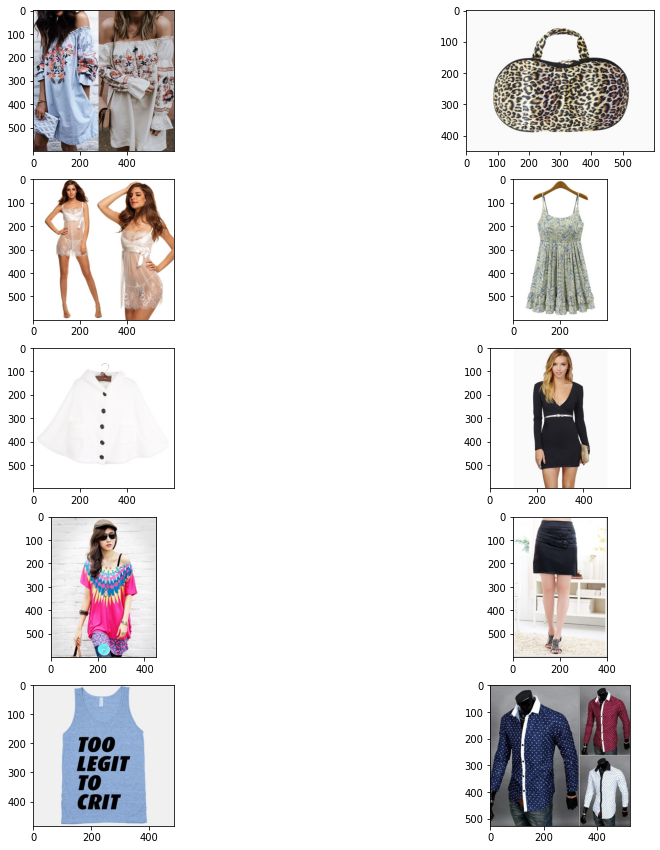

In [ ]:
#Display sample images from training set 
import PIL
axs = plt.subplots 

idxs = [8,5,10,11,14,15,17,18,35,60]

fig, axs = plt.subplots(5,2, figsize=(15,15))
k=0
for i in range(5):
  for j in range(2):          
    Img = samples_df.iloc[idxs[k], 0]
    k=k+1
    axs[i][j].imshow(mpimg.imread(os.path.join('/content/drive/My Drive/iMaterialist2000/', Img)))

Now prepare the validation set

In [ ]:
valid_df = valid_df.drop(['imageId'], axis=1)

In [ ]:
valid_df

,labelId,url
0,"[62, 17, 66, 214, 105, 137, 85]",https://contestimg.wish.com/api/webimage/568e1...
1,"[95, 17, 66, 214, 164, 137, 20, 204, 184]",https://contestimg.wish.com/api/webimage/5452f...
2,"[122, 19, 66, 186, 180, 44, 154, 20]",https://contestimg.wish.com/api/webimage/54058...
3,"[190, 222, 66, 153, 164, 226, 53, 184]",https://contestimg.wish.com/api/webimage/540c6...
4,"[62, 66, 153, 171, 111, 137, 70, 204, 184]",https://contestimg.wish.com/api/webimage/54477...
...,...,...
9892,"[189, 66, 111, 180, 176, 20]",https://contestimg.wish.com/api/webimage/576e5...
9893,"[33, 117, 106, 53, 184]",https://contestimg.wish.com/api/webimage/53742...
9894,"[190, 113, 153, 164, 222, 53, 184]",https://contestimg.wish.com/api/webimage/53772...
9895,"[18, 66, 222, 131, 205, 105, 44]",https://contestimg.wish.com/api/webimage/54883...


In [ ]:
#Sample 500 images from the validation set to create a smaller valid set
valid_df = valid_df.sample(n=500, random_state=50)
valid_df.shape

(500, 2)

In [ ]:
#Function call to convert LabelId to LabelNames
valid_label = id_to_name(valid_df, label_dict)

In [ ]:
len(valid_label)

500

In [ ]:
type(valid_label)

list

In [ ]:
#Function call to prepare the labels by inserting a semicolon between each label for an image
vlabel = labelprep(valid_label)

In [ ]:
print(len(vlabel))

#display sample of final validation labels
vlabel[5]

500


'Dresses;Female;Round Neck;Long Sleeved;Black;Beige;Cotton;Spandex;Peplum;Pleated'

In [ ]:
#Add the new Textual Labels column to the dataframe
valid_df['labels'] = vlabel
valid_df

,labelId,url,labels
2274,"[58, 142, 222, 17, 66, 210, 164, 137, 181, 218]",https://contestimg.wish.com/api/webimage/54a39...,Dance Wear;Purple;White;Black;Female;U-Necks;S...
4749,"[15, 66, 180, 111, 186, 176, 115, 70, 10, 9, 138]",https://contestimg.wish.com/api/webimage/540ea...,Bikinis;Female;Strapless;Multi Color;Sweethear...
7192,"[185, 17, 78, 164, 113, 53, 147]",https://contestimg.wish.com/api/webimage/5800a...,Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...
4483,"[189, 66, 125, 222, 115, 181]",https://contestimg.wish.com/api/webimage/5a0fc...,Swimsuits;Female;Peach;White;Nylon;Stripes
6615,"[136, 106, 49, 164, 78, 17, 53]",https://contestimg.wish.com/api/webimage/5921d...,Polos;Male;Collared;Short Sleeves;Gray;Black;C...
...,...,...,...
624,"[52, 66, 171, 148, 222, 178, 215, 128, 154]",https://contestimg.wish.com/api/webimage/54487...,Costumes & Cosplay;Female;Sleeveless;Red;White...
3712,"[141, 106, 153, 105, 17, 78, 79, 35, 181]",https://contestimg.wish.com/api/webimage/543ff...,Pullover Sweaters;Male;Round Neck;Long Sleeved...
562,"[4, 66, 153, 105, 78, 125, 147, 209]",https://contestimg.wish.com/api/webimage/540f1...,Athletic Sets;Female;Round Neck;Long Sleeved;G...
4679,"[183, 106, 105, 17, 222, 49, 115, 209]",https://contestimg.wish.com/api/webimage/557eb...,Suits & Blazers;Male;Long Sleeved;Black;White;...


In [ ]:
#Function call to download images
fpaths = retrieve_images(valid_df, 'valid500_images')

In [ ]:
len(fpaths)

500

In [ ]:
valid_df['file_path'] = fpaths

In [ ]:
valid_df

,labelId,url,labels,file_path
2274,"[58, 142, 222, 17, 66, 210, 164, 137, 181, 218]",https://contestimg.wish.com/api/webimage/54a39...,Dance Wear;Purple;White;Black;Female;U-Necks;S...,/content/drive/My Drive/valid500_images/54a392...
4749,"[15, 66, 180, 111, 186, 176, 115, 70, 10, 9, 138]",https://contestimg.wish.com/api/webimage/540ea...,Bikinis;Female;Strapless;Multi Color;Sweethear...,/content/drive/My Drive/valid500_images/540ea6...
7192,"[185, 17, 78, 164, 113, 53, 147]",https://contestimg.wish.com/api/webimage/5800a...,Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...,/content/drive/My Drive/valid500_images/5800ab...
4483,"[189, 66, 125, 222, 115, 181]",https://contestimg.wish.com/api/webimage/5a0fc...,Swimsuits;Female;Peach;White;Nylon;Stripes,/content/drive/My Drive/valid500_images/5a0fcb...
6615,"[136, 106, 49, 164, 78, 17, 53]",https://contestimg.wish.com/api/webimage/5921d...,Polos;Male;Collared;Short Sleeves;Gray;Black;C...,/content/drive/My Drive/valid500_images/5921db...
...,...,...,...,...
624,"[52, 66, 171, 148, 222, 178, 215, 128, 154]",https://contestimg.wish.com/api/webimage/54487...,Costumes & Cosplay;Female;Sleeveless;Red;White...,/content/drive/My Drive/valid500_images/544876...
3712,"[141, 106, 153, 105, 17, 78, 79, 35, 181]",https://contestimg.wish.com/api/webimage/543ff...,Pullover Sweaters;Male;Round Neck;Long Sleeved...,/content/drive/My Drive/valid500_images/543fff...
562,"[4, 66, 153, 105, 78, 125, 147, 209]",https://contestimg.wish.com/api/webimage/540f1...,Athletic Sets;Female;Round Neck;Long Sleeved;G...,/content/drive/My Drive/valid500_images/540f17...
4679,"[183, 106, 105, 17, 222, 49, 115, 209]",https://contestimg.wish.com/api/webimage/557eb...,Suits & Blazers;Male;Long Sleeved;Black;White;...,/content/drive/My Drive/valid500_images/557eba...


In [ ]:
#Drop labelId and url columns
valid_df = valid_df.drop(['labelId', 'url'], axis=1)

In [ ]:
#Reorder the columns
valid_df = valid_df[['file_path', 'labels']]

In [ ]:
valid_df

,file_path,labels
2274,/content/drive/My Drive/valid500_images/54a392...,Dance Wear;Purple;White;Black;Female;U-Necks;S...
4749,/content/drive/My Drive/valid500_images/540ea6...,Bikinis;Female;Strapless;Multi Color;Sweethear...
7192,/content/drive/My Drive/valid500_images/5800ab...,Sweatpants;Black;Gray;Short Sleeves;Neutral;Co...
4483,/content/drive/My Drive/valid500_images/5a0fcb...,Swimsuits;Female;Peach;White;Nylon;Stripes
6615,/content/drive/My Drive/valid500_images/5921db...,Polos;Male;Collared;Short Sleeves;Gray;Black;C...
...,...,...
624,/content/drive/My Drive/valid500_images/544876...,Costumes & Cosplay;Female;Sleeveless;Red;White...
3712,/content/drive/My Drive/valid500_images/543fff...,Pullover Sweaters;Male;Round Neck;Long Sleeved...
562,/content/drive/My Drive/valid500_images/540f17...,Athletic Sets;Female;Round Neck;Long Sleeved;G...
4679,/content/drive/My Drive/valid500_images/557eba...,Suits & Blazers;Male;Long Sleeved;Black;White;...


In [ ]:
#Save the validation dataframe
valid_df.to_csv('/content/drive/My Drive/valid500.csv', index = False)

#Load on restart
#valid_df = pd.read_csv('/content/drive/My Drive/valid500.csv')

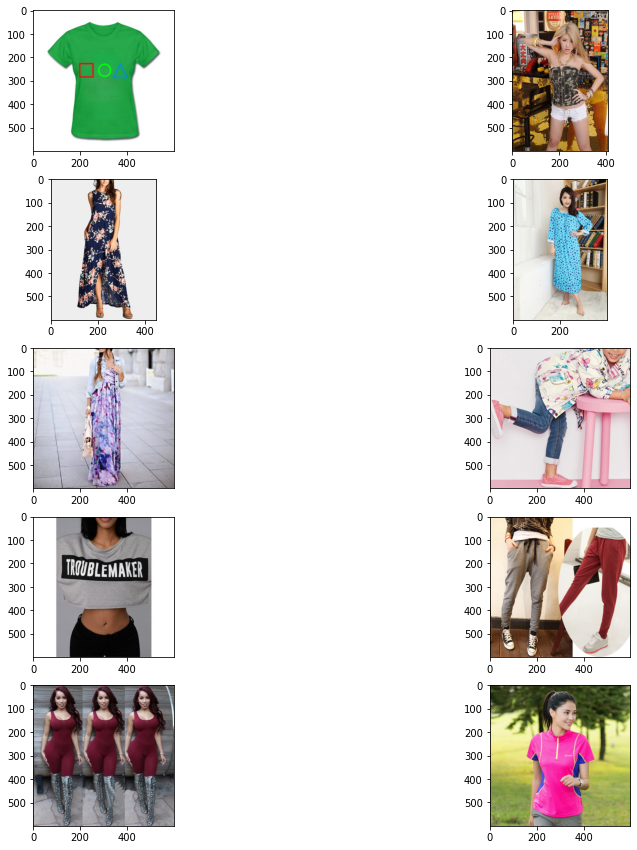

In [ ]:
#Display sample images from validation set
import PIL
axs = plt.subplots 

idxs = [8,305,102,11,414,158,343,245,200,76]

fig, axs = plt.subplots(5,2, figsize=(15,15))
k=0
for i in range(5):
  for j in range(2):          
    Img = valid_df.iloc[idxs[k], 0]
    k=k+1
    axs[i][j].imshow(mpimg.imread(os.path.join('/content/drive/My Drive/valid500_images/', Img)))